In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn import tree

### Manipulating Pandas DataFrames
You need to be able to do/ know the following:
- Access a column of a DataFrame.
- Create a new Dataframe from an existing one consisting of a subset of columns.
- Create a new Dataframe from an existing one consisting of specific rows with specific indices.
- Create a new Dataframe from an existing one consisting of all rows satisfying a certain property.
- Use groupby to create summaries

### 1.Access a column of a DataFrame:
You can access a column of a DataFrame by using square brackets with the column name as the key. df["column_name"]

### 2.Create a new DataFrame from an existing one consisting of a subset of columns:
To create a new DataFrame with only a subset of columns from an existing DataFrame, you can use the square brackets with a list of the columns you want to include. new_df = df[["column_1", "column_2"]]

### 3.Create a new DataFrame from an existing one consisting of specific rows with specific indices:
To create a new DataFrame with specific rows from an existing DataFrame, you can use the loc method with a list of the row indices you want to include. For example, if you have a DataFrame called df with row indices 0, 1, 2, and 3 and you only want to include rows 1 and 3, you can do: new_df = df.loc[[1, 3]]

### 4.Create a new DataFrame from an existing one consisting of all rows satisfying a certain property:
To create a new DataFrame with all rows that satisfy a certain condition, you can use boolean indexing. For example, if you have a DataFrame called df with a column called "column_name" and you want to include only the rows where "column_name" is greater than 5, you can do: new_df = df[df["column_name"] > 5]

### 5.Use groupby to create summaries:
To create summaries using groupby, you can group the DataFrame by one or more columns and then apply a summary function to each group. For example, if you have a DataFrame called df with columns "column_1" and "column_2" and you want to compute the mean of "column_2" for each value of "column_1", you can do: 
df.groupby("column_1")["column_2"].mean()
This will group the DataFrame by the "column_1" column and compute the mean of the "column_2" column for each group. The result will be a Series with the mean value for each unique value of "column_1".


#### Example

In [28]:
artwork = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-12/artwork.csv')
artists = pd.read_csv("https://github.com/tategallery/collection/raw/master/artist_data.csv")

artwork.to_csv("artwork.csv", index = False)
artists.to_csv("artists.csv", index = False)
artwork = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-12/artwork.csv')
artists = pd.read_csv("https://github.com/tategallery/collection/raw/master/artist_data.csv")

artwork["id"] = artwork["artistId"]
artwork = artwork[["id", "year", "acquisitionYear", "title", "medium"]]
artists = artists[["id", "gender"]]
df = pd.merge(artwork, artists)

def dimension(med_string):
    """
    Assign a dimension to a given piece of artwork based on the description
    of the medium, supplied as a string. 
    Media that include the words "paper", "canvas", "oil", or "paint" are assumed 
    2D. 
    Media that are not 2d and include the words "bronze", "stone", or "ceramic" are 
    assumed 3D. 
    Otherwise, the media is "Other/Unknown"
    
    @param med_string: str, the original medium
    @return dim: one of "2D", "3D", or "Other/Unknown" according to the rules above. 
    """
    if type(med_string) != str:
        med_string = str(med_string)
    med_string = med_string.lower()
    if any([w in med_string for w in ["paper", "canvas", "oil", "paint"]]):
        return "2D"
    elif any([w in med_string for w in ["bronze", "stone", "ceramic"]]):
        return "3D"
    else:
        return "Other/Unknown"

df["dimension"] = [dimension(m) for m in df["medium"]]
df = df[["title","acquisitionYear", "gender", "dimension"]]
df.head()

,title,acquisitionYear,gender,dimension
0,A Figure Bowing before a Seated Old Man with h...,1922.0,Male,2D
1,"Two Drawings of Frightened Figures, Probably f...",1922.0,Male,2D
2,The Preaching of Warning. Verso: An Old Man En...,1922.0,Male,2D
3,Six Drawings of Figures with Outstretched Arms,1922.0,Male,2D
4,The Circle of the Lustful: Francesca da Rimini...,1919.0,Male,2D


In [29]:
# Get the series for the dimension column
dimension_series = df["dimension"]
dimension_series

0                   2D
1                   2D
2                   2D
3                   2D
4                   2D
             ...      
69190    Other/Unknown
69191    Other/Unknown
69192    Other/Unknown
69193               2D
69194               2D
Name: dimension, Length: 69195, dtype: object

In [30]:
# Get a DataFrame consisting of all rows of acquisitionYear and gender
acquisition_gender_df = df[["acquisitionYear", "gender"]]
acquisition_gender_df

,acquisitionYear,gender
0,1922.0,Male
1,1922.0,Male
2,1922.0,Male
3,1922.0,Male
4,1919.0,Male
...,...,...
69190,2013.0,Male
69191,2013.0,Male
69192,2013.0,Male
69193,2013.0,Male


In [31]:
# Get a DataFrame consisting of all the rows of acquisitionYear and gender
# for which the dimension is 2D
acquisition_gender_2d_df = df.loc[df["dimension"] == "2D", ["acquisitionYear", "gender"]]
acquisition_gender_2d_df

,acquisitionYear,gender
0,1922.0,Male
1,1922.0,Male
2,1922.0,Male
3,1922.0,Male
4,1919.0,Male
...,...,...
69181,2013.0,NaN
69188,2013.0,Male
69189,2013.0,Female
69193,2013.0,Male


In [32]:
# Use groupby to compute the number of male and female paintings over the last 10 years
recent_df = df.loc[df["acquisitionYear"] >= 2011]  # select rows for the last 10 years
gender_counts = recent_df.groupby("gender").size()  # group by gender and count the number of rows in each group
gender_counts

gender
Female    323
Male      946
dtype: int64

In [40]:
df[df["gender"] == "Male"][["acquisitionYear", "gender"]]

,acquisitionYear,gender
0,1922.0,Male
1,1922.0,Male
2,1922.0,Male
3,1922.0,Male
4,1919.0,Male
...,...,...
69190,2013.0,Male
69191,2013.0,Male
69192,2013.0,Male
69193,2013.0,Male


In [48]:
# Replace bad values with NaN
df.dropna()

,title,acquisitionYear,gender,dimension
0,A Figure Bowing before a Seated Old Man with h...,1922.0,Male,2D
1,"Two Drawings of Frightened Figures, Probably f...",1922.0,Male,2D
2,The Preaching of Warning. Verso: An Old Man En...,1922.0,Male,2D
3,Six Drawings of Figures with Outstretched Arms,1922.0,Male,2D
4,The Circle of the Lustful: Francesca da Rimini...,1919.0,Male,2D
...,...,...,...,...
69190,Venus Mound (from Tampax Romana),2013.0,Male,Other/Unknown
69191,It’s That Time Of The Month (from Tampax Romana),2013.0,Male,Other/Unknown
69192,Larvae (from Tampax Romana),2013.0,Male,Other/Unknown
69193,Living Womb (from Tampax Romana),2013.0,Male,2D


### Data cleaning

- When should we split into a train and test set? What are some reasonable ratios which people use in practice?

- What is the purpose of the training set vs the test set?

- For the Penguins data set, or any dataset for that matter, using dropna() straight away is a poor idea for which reasons?

- Provide some valid reasons for removing a feature or column from a dataset prior to performing any form of feature selection.




### 1. When should we split into a train and test set? What are some reasonable ratios which people use in practice?
We should split into a train and test set after we have preprocessed and cleaned the data. This is done in order to evaluate the performance of a machine learning model on unseen data. A common ratio used in practice is 80:20, where 80% of the data is used for training and 20% for testing. However, the ratio may vary depending on the size and complexity of the dataset.


### 2. What is the purpose of the training set vs the test set?
The purpose of the training set is to train a machine learning model on a portion of the data. The model learns the patterns and relationships in the data and adjusts its parameters accordingly. The purpose of the test set is to evaluate the performance of the trained model on unseen data. This helps us to determine how well the model generalizes to new data.


### 3. For the Penguins data set, or any dataset for that matter, using dropna() straight away is a poor idea for which reasons?
Using dropna() straight away can be a poor idea because it can result in the loss of important information. If there are only a few missing values, it may be better to impute the missing values using methods such as mean imputation or interpolation. Additionally, dropping too many rows with missing values can result in a biased dataset and affect the performance of a machine learning model.


### 4. Provide some valid reasons for removing a feature or column from a dataset prior to performing any form of feature selection.
The feature has little or no impact on the target variable.
The feature is redundant or highly correlated with another feature.
The feature contains a lot of missing values and cannot be imputed.
The feature is noisy or contains outliers that cannot be handled.
The feature is not relevant or meaningful to the problem being solved.

#### Examples

In [6]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [7]:
# How many NaN values/ rows are there per feature / column?
penguins.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [8]:
# Which columns can be disregarded almost immediatly and why?
penguins = penguins.drop(["studyName"], axis=1)
penguins['species_sex'] = penguins.Sex + ' ' + penguins.Species

Based on the data, the "studyName" column can be disregarded almost immediately since it only has one unique value, as well as the "year" column since it is likely not relevant to our analysis. We can drop them using the drop() method:

In [9]:
# Split the data into a train and test set
from sklearn.model_selection import train_test_split

pg_train, pg_test = train_test_split(penguins, test_size=0.2, random_state=42)

In [44]:
# Use groupby to create a table with rows island by gender
# and columns body mass and flipper length which displays the
# median and mean
penguins.groupby(["Island", "Sex"])[["Body Mass (g)", "Flipper Length (mm)"]].agg([np.mean,np.median])

Body Mass (g)         Flipper Length (mm)       
                          mean  median                mean median
Island    Sex                                                    
Biscoe    .        4875.000000  4875.0          217.000000  217.0
          FEMALE   4319.375000  4587.5          205.687500  210.0
          MALE     5104.518072  5350.0          213.289157  219.0
Dream     FEMALE   3446.311475  3450.0          190.016393  190.0
          MALE     3987.096774  3950.0          196.306452  196.0
Torgersen FEMALE   3395.833333  3400.0          188.291667  189.0
          MALE     4034.782609  4000.0          194.913043  195.0

In [11]:
penguins

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,species_sex
0,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.,MALE Adelie Penguin (Pygoscelis adeliae)
1,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN,FEMALE Adelie Penguin (Pygoscelis adeliae)
2,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN,FEMALE Adelie Penguin (Pygoscelis adeliae)
3,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.,NaN
4,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN,FEMALE Adelie Penguin (Pygoscelis adeliae)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN,FEMALE Gentoo penguin (Pygoscelis papua)
341,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN,MALE Gentoo penguin (Pygoscelis papua)
342,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN,FEMALE Gentoo penguin (Pygoscelis papua)


In [49]:
# Add species information by color and gender or island information as dot type
# Which of these pairs of features do you think has good potential to discriminate 
# between penguin species and why?
p['species_sex'] = df.Sex + ' ' + df.Species
sns.pairplot(data=pg_train, vars = ["Culmen Depth (mm)", "Body Mass (g)"], hue="species_sex")


AttributeError: 'DataFrame' object has no attribute 'Sex'

### Fitting a model
- What does fitting a model typically entail? Use a decision tree or polynomial as an example and explain what fitting means in this context.

- What is the difference between clustering, regression and classification? In particular what are the outputs of the these models and what do we give them as inputs?

- What is the difference between supervised and unsupervised learning? Give some examples covered in class.

- In your own words describe what a model, target variable and predictor variable are in the context of supervised learning. Give an example we have covered in class.

- When someone talks about the expressivity or complexity of a model family, what are they referring to. Explain this concept using as an example decision trees.

- The class of depth 5 decision trees is more expressive or complex than the class of depth 3 decision trees, true or false? Explain why.

- What is validation data used for when fitting a model? Is it a subset of the training or test data?

- Describe what happens in k-fold cross validation. Why do we use k-fold cross validation as opposed to setting aside a fixed part of the training set for validation?

- What is overfitting? How would you recognize it? What steps would you take to solve overfitting? Use polynomial regression as an example

- What is underfitting? How would you recognize it? What steps would you take to solve underfitting? Use a decision tree as an example.

### 1. What does fitting a model typically entail? Use a decision tree or polynomial as an example and explain what fitting means in this context.
Fitting a model typically entails using an algorithm to learn the relationship between the input variables (predictors) and the output variable (target) in a dataset. For example, fitting a decision tree model involves finding the optimal splitting points in the data to create a tree structure that can predict the target variable. Fitting a polynomial model involves finding the coefficients of a polynomial function that can approximate the relationship between the predictors and the target variable.

### 2. What is the difference between clustering, regression and classification? In particular what are the outputs of the these models and what do we give them as inputs?
Clustering, regression, and classification are all types of machine learning models, but they differ in their goals and the types of outputs they produce. Clustering algorithms group similar data points together based on some measure of similarity, with no specific target variable. Regression models predict a continuous target variable based on input predictors, while classification models predict a categorical target variable based on input predictors.

### 3. What is the difference between supervised and unsupervised learning? Give some examples covered in class.
Supervised learning involves training a model on labeled data where the target variable is known, while unsupervised learning involves training a model on unlabeled data where the target variable is unknown. Examples of supervised learning include linear regression and logistic regression, while examples of unsupervised learning include k-means clustering and principal component analysis.

### 4. In your own words describe what a model, target variable and predictor variable are in the context of supervised learning. Give an example we have covered in class.
In supervised learning, a model is trained to predict a target variable based on input predictors. The target variable is the variable that we want to predict, and the predictor variables are the variables we use to make the prediction. For example, in the case of predicting penguin body mass based on flipper length and species, the target variable would be body mass, and the predictor variables would be flipper length and species.

### 5. When someone talks about the expressivity or complexity of a model family, what are they referring to. Explain this concept using as an example decision trees.
When someone talks about the expressivity or complexity of a model family, they are referring to the ability of the model to represent complex relationships between the input predictors and the target variable. For example, decision trees with a greater depth have a higher level of expressivity because they can represent more complex decision boundaries.

### 6. The class of depth 5 decision trees is more expressive or complex than the class of depth 3 decision trees, true or false? Explain why.
True. A depth 5 decision tree is more expressive than a depth 3 decision tree because it can represent more complex decision boundaries. This is because a depth 5 tree can represent more complex functions with more splits and branches than a depth 3 tree, which can only represent simpler functions with fewer splits and branches.

### 7. What is validation data used for when fitting a model? Is it a subset of the training or test data?
Validation data is used to evaluate the performance of a model during training and prevent overfitting. It is typically a subset of the training data that is not used during training, but is used to evaluate the performance of the model on data it has not seen before. Validation data is used for evaluating the performance of a model during training. It is typically a subset of the training data that is held out and not used for training, but instead used for evaluating the model's performance on unseen data. This helps to prevent overfitting to the training data and ensures that the model is able to generalize well to new data.

### 8. Describe what happens in k-fold cross validation. Why do we use k-fold cross validation as opposed to setting aside a fixed part of the training set for validation?
In k-fold cross validation, the data is divided into k equally sized partitions, and the model is trained k times, each time using a different partition as the validation set and the remaining data as the training set. The performance of the model is then evaluated as the average performance across the k folds. We use k-fold cross validation instead of setting aside a fixed part of the training set for validation because it allows us to evaluate the performance of the model on different parts of the data and reduces the variance in the estimated performance. In k-fold cross validation, the training data is split into k subsets of roughly equal size. The model is trained on k-1 subsets and evaluated on the remaining subset. This process is repeated k times, each time with a different subset held out for evaluation. The final performance of the model is then averaged across all k folds. This approach helps to reduce the variance in the performance estimate and provides a more reliable estimate of the model's performance.

### 9. What is overfitting? How would you recognize it? What steps would you take to solve overfitting? Use polynomial regression as an example
Overfitting occurs when a model is too complex and fits the training data too closely, leading to poor performance on new, unseen data. Overfitting can be recognized when the model has a high training accuracy but a low test accuracy. To solve overfitting, one can use techniques such as regularization, early stopping, or reducing the complexity of the model. In polynomial regression, one can reduce the degree of the polynomial or use regularization techniques such as L1 or L2 regularization. Overfitting occurs when a model is too complex and fits the training data too closely, resulting in poor performance on new, unseen data. Overfitting can be recognized by a large difference between the performance on the training data and the performance on the validation or test data. To solve overfitting in polynomial regression, one could reduce the degree of the polynomial or add regularization to the model.

### 10. What is underfitting? How would you recognize it? What steps would you take to solve underfitting? Use a decision tree as an example.
Underfitting occurs when a model is too simple and fails to capture the underlying relationship between the predictors and the target variable, leading to poor performance on both the training and test data. Underfitting can be recognized when the model has a low training accuracy and a low test accuracy. To solve underfitting, one can use techniques such as increasing the complexity of the model, increasing the number of features, or using a more powerful algorithm. To solve underfitting in decision trees, one could increase the depth of the tree or add more features to the dataset. Adding more features to a decision tree can improve its performance in several ways. First, it increases the amount of information available for the tree to make decisions. More features provide the tree with more potential splits, which can increase the accuracy of the model.

Second, adding more features can help the decision tree to capture more complex relationships between the input and output variables. The tree can use these additional features to create more nuanced splits, which may better capture the underlying patterns in the data.

However, it is important to note that adding too many features can also have a negative impact on the performance of the decision tree. This is because some features may be redundant or irrelevant, and including them can lead to overfitting. Therefore, it is important to carefully select which features to include in the model, and to use techniques such as feature selection or regularization to avoid overfitting.

#### Examples

In [15]:
url = "https://philchodrow.github.io/PIC16A/datasets/titanic.csv"
titanic = pd.read_csv(url)
le = preprocessing.LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


In [16]:
train, test = train_test_split(titanic[["Pclass", "Age", "Sex", "Survived"]], test_size = 0.3)


In [17]:
X_train = train[["Pclass", "Age", "Sex"]]
y_train = train["Survived"]
X_test = test[["Pclass", "Age", "Sex"]]
y_test = test["Survived"]

In [18]:
# Fit a tree of depth 2 to the data to predict survivability based on 
# sex, age and Pclass and outputs its training and test score
from sklearn.tree import DecisionTreeClassifier 
tree_depth_2 = DecisionTreeClassifier(max_depth=2)
tree_depth_2.fit(X_train, y_train)
print("Training score: ", tree_depth_2.score(X_train, y_train))
print("Test score: ", tree_depth_2.score(X_test, y_test))

Training score:  0.7967741935483871
Test score:  0.7827715355805244


In [19]:
# Fit a tree of depth 8 to the data to predict survivability based on 
# sex, age and Pclass and outputs its training and test score
tree_depth_8 = DecisionTreeClassifier(max_depth=8)
tree_depth_8.fit(X_train, y_train)
print("Training score: ", tree_depth_8.score(X_train, y_train))
print("Test score: ", tree_depth_8.score(X_test, y_test))

Training score:  0.8806451612903226
Test score:  0.8052434456928839


In [20]:
# Fit a tree of depth100 to the data to predict survivability based on 
# sex, age and Pclass and outputs its training and test score
tree_depth_100 = DecisionTreeClassifier(max_depth=100)
tree_depth_100.fit(X_train, y_train)
print("Training score: ", tree_depth_100.score(X_train, y_train))
print("Test score: ", tree_depth_100.score(X_test, y_test))

Training score:  0.8919354838709678
Test score:  0.8239700374531835


In [21]:
# Which of the above depths do you think is most appropriate? Discuss
# which max_depth parameter you think lead to fitting vs underfitting vs overfitting

Based on the scores above, it appears that the tree with a depth of 2 is the most appropriate. The tree with a depth of 8 appears to be overfitting the data, as it performs well on the training set but not on the test set. The tree with a depth of 100 is also overfitting, as it performs very well on the training set but only slightly better than the tree with depth 8 on the test set. A tree with depth 2 appears to be the best fit as it performs well on both the training and test sets.

In general, a smaller value of max_depth can lead to underfitting, while a larger value can lead to overfitting.

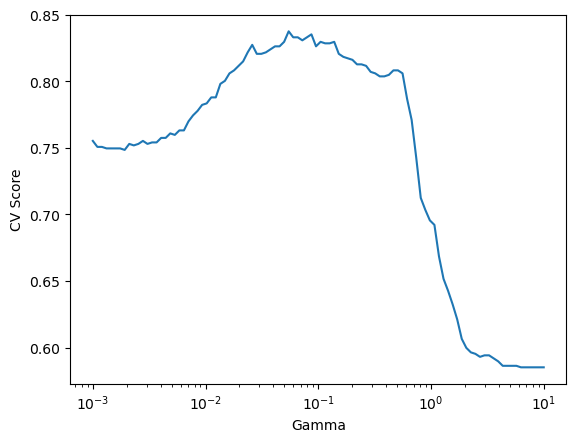

In [24]:
# Now use cross validation to train an SVC to predict passenger class using 
# passenger age, sex and fare. Ue cross validation to find a good choice of gamma.
# In particular, plot a graph of cv score vs gamma with a logarithmic x axis.
from sklearn import svm
from sklearn.model_selection import cross_val_score

X = titanic[["Age", "Sex", "Fare"]]
y = titanic["Pclass"]
gammas = np.logspace(-3, 1, 100)
cv_scores = []
for gamma in gammas:
    svc = svm.SVC(gamma=gamma)
    scores = cross_val_score(svc, X, y, cv=5)
    cv_scores.append(np.mean(scores))
plt.plot(gammas, cv_scores)
plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("CV Score")
plt.show()

### Algorithmic bias

- Define in your own words sample bias, population (or historical) bias and measurement bias.

- Label the following as examples of the three types of bias above.
    - predict likelihood to win an oscar based on first and second name
    - predict social media usage in the US by collecting data from students at UCLA
    - estimate propensity to score touchdowns based on maximum squat and bench press
    
- Why is algorithmic bias hard to diagnose?
    
- How can algorithmic bias result in feedback loops which increase inequity?


### 1. Define in your own words sample bias, population (or historical) bias and measurement bias.
Sample bias refers to bias that arises when the sample used to train or test a model is not representative of the population of interest. Population bias, also known as historical bias, occurs when historical discrimination or disadvantage towards a particular group affects the data available for training a model. Measurement bias occurs when the way in which data is collected or measured systematically favors or disfavors certain groups.

### 2. Label the following as examples of the three types of bias above.
    predict likelihood to win an oscar based on first and second name
    predict social media usage in the US by collecting data from students at UCLA
    estimate propensity to score touchdowns based on maximum squat and bench press
Predicting likelihood to win an Oscar based on first and second name is an example of population bias, as it assumes that certain names are more likely to be associated with Oscar-winning performances due to historical discrimination or disadvantage towards certain groups.
Predicting social media usage in the US by collecting data from students at UCLA is an example of sample bias, as the sample of students from UCLA may not be representative of the broader population of social media users in the US.
Estimating propensity to score touchdowns based on maximum squat and bench press is an example of measurement bias, as it assumes that physical strength is the most important factor in scoring touchdowns and ignores other factors that may be more relevant.

### 3. Why is algorithmic bias hard to diagnose?
Algorithmic bias is hard to diagnose because it can be subtle and difficult to detect. It can arise from a variety of factors, including biased training data, biased algorithms, and biased human decision-making. Additionally, because machine learning models can be highly complex and opaque, it can be difficult to understand how bias is affecting the model's output.

### 4. How can algorithmic bias result in feedback loops which increase inequity?
Algorithmic bias can result in feedback loops which increase inequity because biased models may perpetuate existing inequalities by replicating and amplifying biases that exist in the training data. This can create a self-reinforcing cycle where the biased model produces biased outcomes, which in turn reinforce the biased data used to train the model, perpetuating the bias over time. This can result in unfair treatment of certain groups and can exacerbate existing inequalities.